# Regression Models to predict the critical temperature for the superconductors.

- Datasets:<br>
  1> train_original.csv - given dataset<br>
  2> new_featureset.csv - selected features from teh given dataset (train_original.csv)<br>
  3> Test_new.csv and Train_new.csv  -Training and testing files in 80% - 20% ratio from <b>new_featureset.csv</b> <br><br>
  
- From the given dataset, I coud find that,<br>
  - It contains mainly 8 Features to predict Semisonductor Temperature:
    1 Atomic Mass<br>
    2 First Ionization Energy (fie)<br>
    3 Atomic Radius <br>
    4 Density <br>
    5 Electron Affinity<br> 
    6 Fusion Heat <br>
    7 Thermal Conductivity <br>
    8 Valence <br><br>
    
 By reading some documents and websites related to semiconductor and its important features,
 I could finalixe that not all the features are important and I extracted required features from teh given dataset.
- <b>Important features are</b> 
  - Mass
  - Volume
  - Density
  - Thermal Conductivity
  - Atomic Radius
<br><br>  
- I have extrated 39 features from given dataset and created a new dataset: <b>extracted_features.csv</b>
- Also from one research paper <a href="https://arxiv.org/pdf/1803.10260.pdf"><b>"Reference"</b></a>, I could find 20 feature sets.   <br>I have also tried with that and got almost same accuracy (near to 91%)
  Dataset with 20 feature is: <b>new_featureset.csv</b><br> <br>
  
  + Here, I have used <b>"new_featureset.csv"</b> for the prediction.
  
 
- All the 8 Features are shown with 10 subfeatures like
  - range
  - mean
  - wtd = weighted
  - gmean = geometric mean
  - std = standard deviation.
    and more
<br><br>
- Regression Algorithms applied: <br>
  - Linear Regression
  - Logistic Regression
  - Lasso Regression
  - Ridge Regression
  - XGBoost Regressior<br>
<br>
- Preprocessing Technique used:
  fit_transform and MinMaxScaler() from sklearn preprocessing to range the data between 0 and 1<br><br>
  
- Results/Predictions
  I have got the results using both the dataset 1> given dataset and 2> selected features Dataset<br>
  to compare the accuracy and could conclude,<br>
  to go with Selected Features Dataset: new_featureset.csv<br>
  
  
  
  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb                               # if xgboost is not present in environment, install it first using conda/pip
from sklearn import  preprocessing                    # to preprocess the data
from sklearn.model_selection import train_test_split  # split the data into train test division

- Adding the Data for training

  <b>new_featureset.csv</b> contains 20 seleted features from the given dataset to reduce dimensions to get more accurate  
  predictions<br>
- X_train: Set of Independent Features to predict Dependent Feature(here critical_temp)<br>
- Y_train: Dependent Variable  <br>

In [16]:
#train_df = pd.read_csv("train_original.csv",delimiter=',')   # given dataset
#train_df = pd.read_csv("extracted_features.csv",delimiter=',')   #extracted by my choice
train_df = pd.read_csv("new_featureset.csv",delimiter=',')       # extracted as per the research paper I found
X_train = train_df.drop(['number_of_elements','critical_temp'],axis=1)
Y = train_df['critical_temp']

In [5]:
X_train.columns  # list of 20 Independent Selected Features from the given dataset

Index(['std_atomic_mass', 'std_atomic_mass.1', 'wtd_mean_atomic_mass',
       'wtd_std_atomic_mass', 'range_atomic_radius', 'std_Density',
       'gmean_Density', 'range_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'wtd_entropy_Valence', 'wtd_mean_Valence', 'wtd_gmean_Valence',
       'wtd_std_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_range_ElectronAffinity'],
      dtype='object')

<b>Preprocessing the Data using sklearn preprocessing MinMaxScaler()</b>

In [18]:
X_scaled = preprocessing.MinMaxScaler()
X = X_scaled.fit_transform(X_train)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.21, random_state=2)

Here Dataset is divied into train test part with <b>21% as a Test data</b> and remaining as <b>Train Data</b><br>

Next is to train the model using different Regresion Models<br>
- Linear Regression (because it is mostly used)<br>
- Ridge Regression (Because this model can be used when data is suffers from multicollinearity ( independent variables are<br>
  highly correlated))<br>
  ref: https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/ <br>

- XGBoost [Extreme Gradient Boosting] Regressor
   it uses a gradient descent algorithm to minimize the loss when adding new models.

-  Here I am showing Prediction and accuracy results with <b>XGBoost Regressor</b><br>
   For another two Regression models, I will attach .py files with the submission.

In [22]:
model = xgb.XGBRegressor(learning_rate=0.12,subsample=0.85,max_depth=6, min_child_weight=3)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.12, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.85)

<b>In this above model I have assigned a perticualr value to the parameters of regressor model to get possible good accuracy and best fit</b>
learning_rate=0.12,subsample=0.85,max_depth=6, min_child_weight=3

because for some default values, I was getting more <b>-ve</b> temperature predictions for Range <br>
<b>0</b> < <b>critical temp</b> < <b>5</b> 


In [23]:
predictions = model.predict(X_test) # Predict the Test Data

In [24]:
# Creating a Dataframe to store a result into a csv file to compare
final_df = pd.DataFrame()
final_df["Original Temp"] = y_test
final_df["Predicted_Temp"] = predictions
#final_df.to_csv("Output.csv")   # remove comment while require output file

In [25]:
"""
Calculating Accuracy with testing Data
"""
accuracy = model.score(X_test,y_test)
print ("accuracy is: ",accuracy*100,'%') # accuracy result is: accuracy is around:  91.048%

accuracy is:  91.04879152322852 %


I am going to plot the graph of <b>Actual Temp</b> vs <b>Predicted Temp</b>

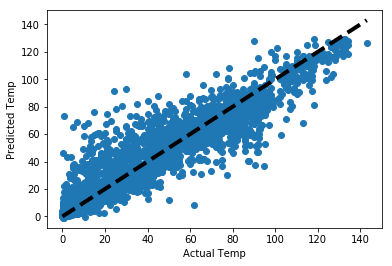

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Temp')
ax.set_ylabel('Predicted Temp')
plt.show()

Using XGBosot,
- 
Accuracy achieved: 91.04879152322852 %
from the plot it can be seen that most of predicted results are near the line, that shows model is good to predict and it is less overfitted.


Using another two models,
- 

Accuracy achieved is near to 65%, and prediction results are not comming accurately.
I applied preprocessing methods, also used K fold cross validation which is most useful when model is getting overfitted,
but still accuracy is near to 67%.
> below image is a plot of <b>Actual Temp</b> vs <b>Predicted Temp</b> for Linear Regression with 9 fold Cross Validation.<br>
  <b>Accuracy is: accuracy is:  65.8875 %</b>
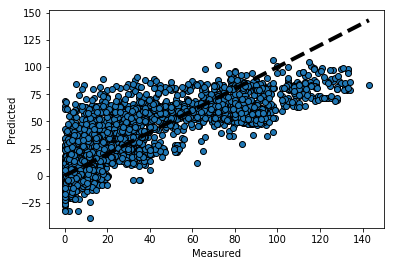

> below image is a plot of <b>Actual Temp</b> vs <b>Predicted Temp</b> for Ridge Regression with Preprocessing the data using MinMaxScaler().<br>
  <b>Accuracy is: accuracy is:  65.879%</b>
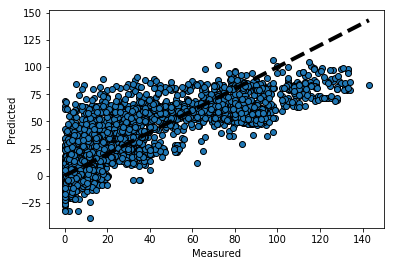

Find a file:<br> 
<b>untitled3_linear.py</b> for Linear Regression<br>
<b>untitled3_Ridge.py</b> for Ridge Regression



With the predicted Critical Temperature for Semiconductor, we can identify the <b>material</b> from the given <b>unique_m.csv</b> file.